# `Concrete slump test`

#### Note:- it measures the consistency of fresh concrete before it actually sets , aslo the workability of feshly made concrete and, also the ease at which the concrete flows.

#### Note:- A compressive strength test will be done on the set concrete after 28 days

## `Project on`- Can we predict the compressive strength results now of the concrete which is going to happen after 28 days. by the help of some input variable like slump test, flow and some other input variable of the cement.

In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
df = pd.read_csv(r'/Users/ishant/Documents/jose+portillia+ml/DATA/cement_slump.csv')

In [6]:
df.head()

,Cement,Slag,Fly ash,Water,SP,Coarse Aggr.,Fine Aggr.,SLUMP(cm),FLOW(cm),Compressive Strength (28-day)(Mpa)
0,273.0,82.0,105.0,210.0,9.0,904.0,680.0,23.0,62.0,34.99
1,163.0,149.0,191.0,180.0,12.0,843.0,746.0,0.0,20.0,41.14
2,162.0,148.0,191.0,179.0,16.0,840.0,743.0,1.0,20.0,41.81
3,162.0,148.0,190.0,179.0,19.0,838.0,741.0,3.0,21.5,42.08
4,154.0,112.0,144.0,220.0,10.0,923.0,658.0,20.0,64.0,26.82


<AxesSubplot:>

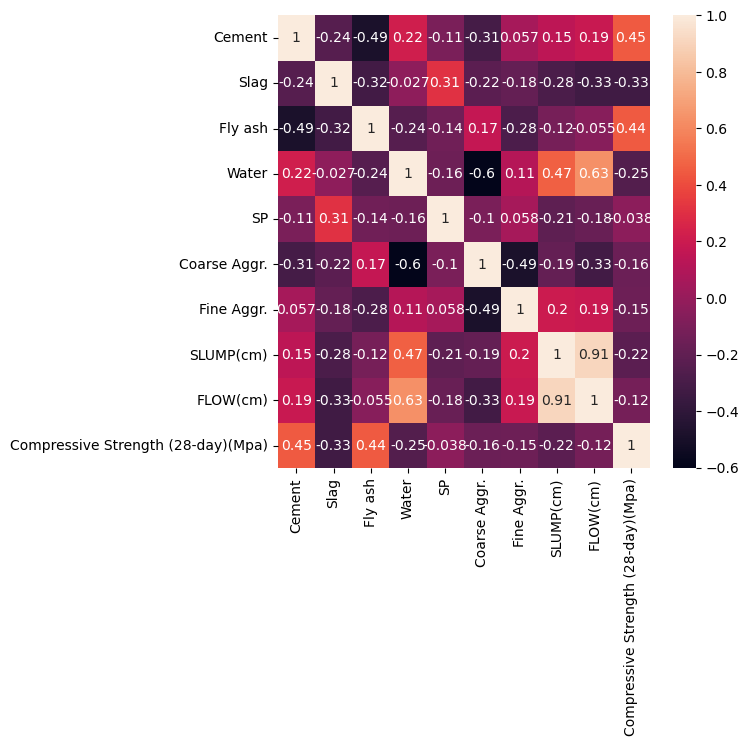

In [10]:
plt.figure(figsize=(6,6),dpi=100)
sns.heatmap(df.corr(),annot=True)

In [11]:
df.columns

Index(['Cement', 'Slag', 'Fly ash', 'Water', 'SP', 'Coarse Aggr.',
       'Fine Aggr.', 'SLUMP(cm)', 'FLOW(cm)',
       'Compressive Strength (28-day)(Mpa)'],
      dtype='object')

In [12]:
X = df.drop('Compressive Strength (28-day)(Mpa)',axis=1)

In [13]:
y = df['Compressive Strength (28-day)(Mpa)']

In [14]:
from sklearn.model_selection import train_test_split

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=101)

#### `scale your data` svm looks at the feature space(on the feature values): whenever you start with any of the algorithms which starts to look at the geometry of the feature space so `scale your data` and, if you are not sure about like wheathe this algol look at the feature space or not so, simply do it anyway it won't harm your model.

In [17]:
from sklearn.preprocessing import StandardScaler

In [18]:
scaler = StandardScaler()

In [19]:
scaled_X_train = scaler.fit_transform(X_train)

In [20]:
scaled_X_test = scaler.transform(X_test)

In [21]:
from sklearn.svm import SVR,LinearSVR
# linear svr is faster than the normal svr but you can only use this when kernel is set to linear.

In [23]:
# help(SVR)

In [24]:
base_model = SVR()

In [25]:
base_model.fit(scaled_X_train,y_train)

SVR()

In [26]:
base_preds = base_model.predict(scaled_X_test)

In [27]:
from sklearn.metrics import mean_absolute_error,mean_squared_error

In [28]:
mean_absolute_error(y_test,base_preds)

5.229307169847239

In [29]:
np.sqrt(mean_squared_error(y_test,base_preds))

6.888110329497351

In [30]:
y_test.mean()

35.68294117647059

###  is these values good well, it totally depends on the your domain knowledge of this.
### but we can evaluate by apply a grid search which can perform than this model

In [34]:
param_grid = {'C':[.001,.01,.1,.5,1],'kernel':['linear','rbf','poly'],
             'gamma':['scale','auto'],
             'degree':[2,3,4],
             'epsilon':[0,.01,.1,.5,1,2]}

In [35]:
from sklearn.model_selection import GridSearchCV

In [36]:
svr = SVR()

In [41]:
grid = GridSearchCV(svr,param_grid,verbose=1)
# verbose is used when the dataset is too large

In [42]:
grid.fit(scaled_X_train,y_train)

Fitting 5 folds for each of 540 candidates, totalling 2700 fits


GridSearchCV(estimator=SVR(),
             param_grid={'C': [0.001, 0.01, 0.1, 0.5, 1], 'degree': [2, 3, 4],
                         'epsilon': [0, 0.01, 0.1, 0.5, 1, 2],
                         'gamma': ['scale', 'auto'],
                         'kernel': ['linear', 'rbf', 'poly']},
             verbose=1)

In [43]:
grid.best_params_

{'C': 1, 'degree': 2, 'epsilon': 2, 'gamma': 'scale', 'kernel': 'linear'}

In [44]:
grid_preds = grid.predict(scaled_X_test)

In [45]:
mean_absolute_error(y_test,grid_preds)

2.4692796880542107

In [46]:
np.sqrt(mean_squared_error(y_test,grid_preds))

3.0877331184389845

# conclusion:-
## Now, we can evaluate that after applying the grid search, we got the better results for the test.